In [1]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scripts.load_data import load_data_from_postgres, load_data_using_sqlalchemy,load_data_to_postgres
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

c:\Users\AII\Desktop\telecommunication-data-analysis\scripts\load_data.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Successfully loaded the data


In [4]:
telecom_data = df.copy()
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
from src.utils import missing_values_table, convert_columns_to_mb,apply_ms_to_sec_and_drop,handeling_missing_data
missing_values_df = missing_values_table(telecom_data)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [7]:

transformed_telecom_data = handeling_missing_data(telecom_data)

# Step 5: Verify if all missing values are handled
print(transformed_telecom_data.isnull().sum().sum())  # This should output 0 if there are no more missing values

# Preview the cleaned data
transformed_telecom_data.head()


0


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
# Example usage
columns_to_convert = ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                      'Activity Duration DL (ms)', 'Activity Duration UL (ms)']

apply_ms_to_sec_and_drop(columns_to_convert, transformed_telecom_data)
# List of columns to convert from Bytes to MB
columns_to_convert = [
    'HTTP UL (Bytes)', 'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)', 'HTTP DL (Bytes)',
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
    'Gaming DL (Bytes)', 'Total DL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)'
]

# Apply the function to convert all columns
convert_columns_to_mb(columns_to_convert, transformed_telecom_data)

,Bearer Id,Start,End,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (MB),Netflix DL (MB),Gaming DL (MB),Total DL (MB),TCP DL Retrans. Vol (MB),TCP UL Retrans. Vol (MB),Other DL (MB),Other UL (MB),Email DL (MB),Email UL (MB)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,23.0,44.0,100.0,...,15.854611,8.198936,278.082303,308.879636,0.0,0.0,171.744450,8.814393,3.563542,0.137762
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,16.0,26.0,100.0,...,20.247395,18.338413,608.750074,653.384965,0.0,0.0,526.904238,15.055145,0.629046,0.308339
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,6.0,9.0,100.0,...,19.725661,17.587794,229.584621,279.807335,0.0,0.0,410.692588,4.215763,2.690151,0.672973
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,44.0,44.0,100.0,...,21.388122,13.994646,799.538153,846.028530,0.0,0.0,749.039933,12.797283,1.439754,0.631229
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,6.0,9.0,100.0,...,15.259380,17.124581,527.707248,569.138589,0.0,0.0,550.709500,13.910322,1.936496,0.173853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,4/30/2019 6:02,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,52.0,65.0,100.0,...,16.191667,17.883703,526.609673,574.175259,0.0,0.0,3.264510,13.487416,0.057639,0.633237
149997,7.349883e+18,4/29/2019 7:28,4/30/2019 10:41,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,23.0,54.0,100.0,...,13.877234,19.350146,626.893062,666.648844,0.0,0.0,712.180387,2.457758,1.954414,0.167304
149998,1.311448e+19,4/29/2019 7:28,4/30/2019 10:46,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,47.0,100.0,...,22.660510,9.963942,553.539484,592.786405,0.0,0.0,121.100856,11.314729,1.525734,0.532543
149999,1.311448e+19,4/29/2019 7:28,4/30/2019 10:40,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,34.0,37.0,100.0,...,8.817106,3.322253,352.536971,371.895920,0.0,0.0,814.713113,1.406930,2.228270,0.622644


In [9]:
# Group by customer (IMSI) and calculate the required averages
customer_aggregation = transformed_telecom_data.groupby('IMSI').agg({
    'TCP DL Retrans. Vol (MB)': 'mean',
    'TCP UL Retrans. Vol (MB)': 'mean',
    'Avg RTT UL (sec)': 'mean',
    'Avg RTT DL (sec)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'  # Keep the first occurrence of the handset type
}).reset_index()

# Rename columns for clarity
customer_aggregation.columns = [
    'IMSI',
    'Avg TCP DL Retransmission (MB)',
    'Avg TCP UL Retransmission (MB)',
    'Avg RTT UL (sec)',
    'Avg RTT DL (sec)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
    'Handset Type'
]

# Display the aggregated data
print(customer_aggregation.head())



           IMSI  Avg TCP DL Retransmission (MB)  \
0  0.000000e+00                       11.507615   
1  2.040471e+14                        0.000000   
2  2.040808e+14                        0.000000   
3  2.082001e+14                        0.002697   
4  2.082001e+14                        0.009107   

   Avg TCP UL Retransmission (MB)  Avg RTT UL (sec)  Avg RTT DL (sec)  \
0                        0.064311          0.010816          0.442767   
1                        0.000000          0.000000          0.000000   
2                        0.000000          0.000000          0.000000   
3                        0.000000          0.016000          0.287000   
4                        0.018872          0.002000          0.082000   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             10828.785965              1636.349123   
1                 2.000000                 0.000000   
2                 1.000000                 0.000000   
3                87.000000        

In [10]:
customer_aggregation.head()

,IMSI,Avg TCP DL Retransmission (MB),Avg TCP UL Retransmission (MB),Avg RTT UL (sec),Avg RTT DL (sec),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,0.000000e+00,11.507615,0.064311,0.010816,0.442767,10828.785965,1636.349123,unknown
1,2.040471e+14,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,Quectel Wireless. Quectel Ec21-E
2,2.040808e+14,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,Quectel Wireless. Quectel Ec25-E
3,2.082001e+14,0.002697,0.000000,0.016000,0.287000,87.000000,22.000000,Dn Electronics Danew Konnect 350
4,2.082001e+14,0.009107,0.018872,0.002000,0.082000,627.000000,127.000000,Samsung Galaxy Grand (Gt-I9060X)


In [11]:
# Get top, bottom, and most frequent values for each required metric
def get_top_bottom_frequent(data, column, top_n=10):
    top_values = data[column].nlargest(top_n)
    bottom_values = data[column].nsmallest(top_n)
    frequent_values = data[column].value_counts().head(top_n)

    return top_values, bottom_values, frequent_values

# List of columns to analyze
columns_to_analyze = [
    'Avg TCP DL Retransmission (MB)',
    'Avg TCP UL Retransmission (MB)',
    'Avg RTT UL (sec)',
    'Avg RTT DL (sec)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
]

# Dictionary to store the results
tcp_rtt_throughput_analysis = {}

# Iterate through each column and get top, bottom, and most frequent values
for column in columns_to_analyze:
    top_values, bottom_values, frequent_values = get_top_bottom_frequent(customer_aggregation, column)
    tcp_rtt_throughput_analysis[column] = {
        'Top 10': top_values,
        'Bottom 10': bottom_values,
        'Most Frequent 10': frequent_values
    }

# Display the results for each metric
for metric, values in tcp_rtt_throughput_analysis.items():
    print(f"Metric: {metric}")
    print("Top 10 Values:\n", values['Top 10'])
    print("Bottom 10 Values:\n", values['Bottom 10'])
    print("Most Frequent 10 Values:\n", values['Most Frequent 10'])
    print("\n" + "-"*50 + "\n")


Metric: Avg TCP DL Retransmission (MB)
Top 10 Values:
 76094    4289.487601
70099    4288.060364
25609    4268.431996
27763    4254.643827
82402    4211.189017
66330    4166.590984
31006    4131.045758
81325    4117.753418
76791    3968.072422
97868    3785.294754
Name: Avg TCP DL Retransmission (MB), dtype: float64
Bottom 10 Values:
 1     0.0
2     0.0
5     0.0
6     0.0
7     0.0
10    0.0
11    0.0
15    0.0
17    0.0
28    0.0
Name: Avg TCP DL Retransmission (MB), dtype: float64
Most Frequent 10 Values:
 Avg TCP DL Retransmission (MB)
0.000000    58427
0.001330      297
0.002660      165
0.000038      136
0.000092      135
0.000665      105
0.000046      104
0.001318       98
0.003990       88
0.000543       79
Name: count, dtype: int64

--------------------------------------------------

Metric: Avg TCP UL Retransmission (MB)
Top 10 Values:
 83217    2455.599840
25295    1751.383517
31950    1727.810000
11182    1292.146672
27902     794.825766
19564     719.571807
82273     526

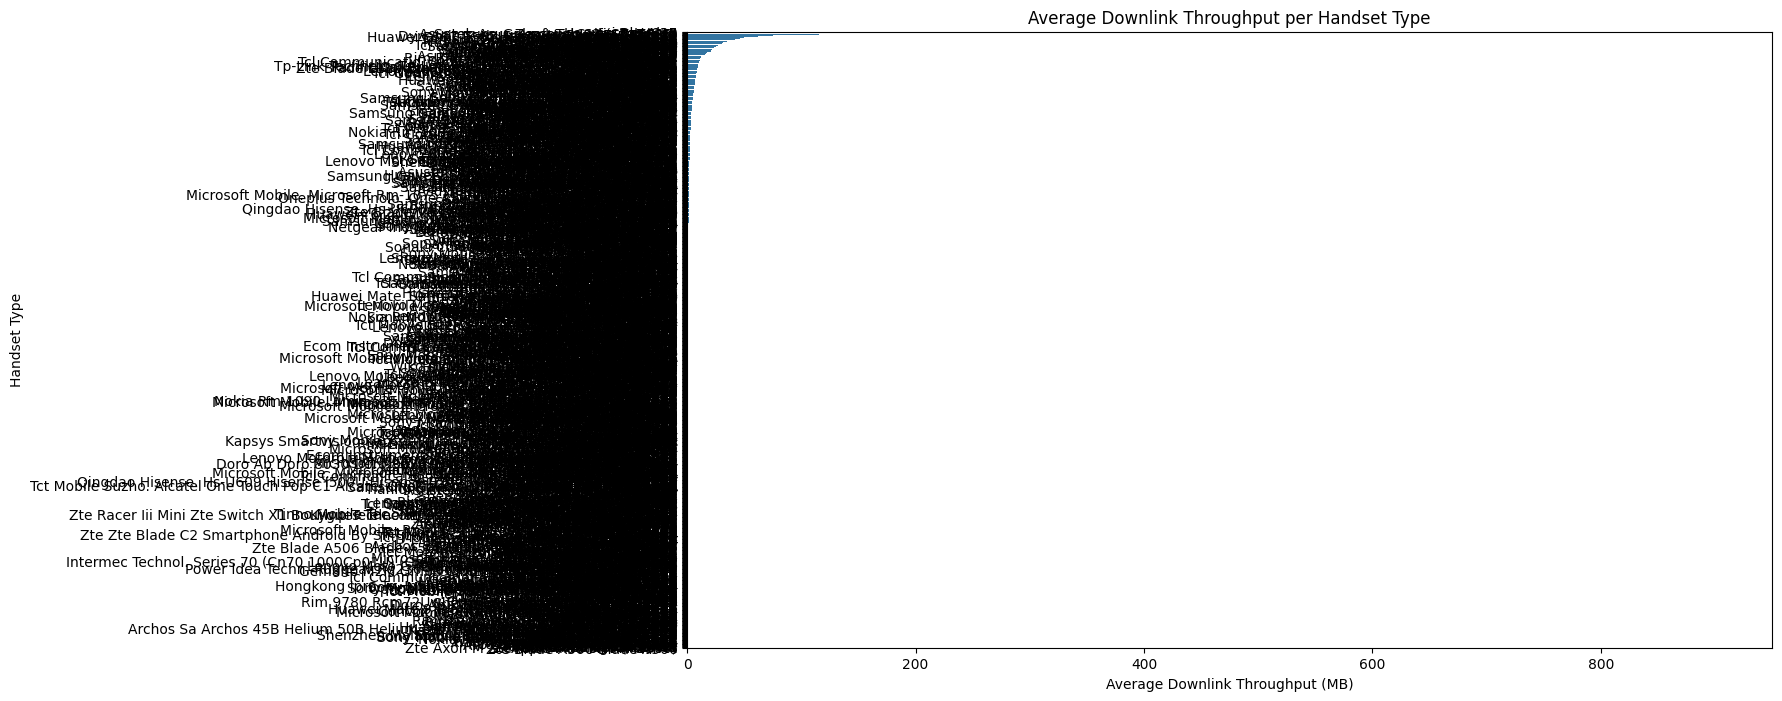

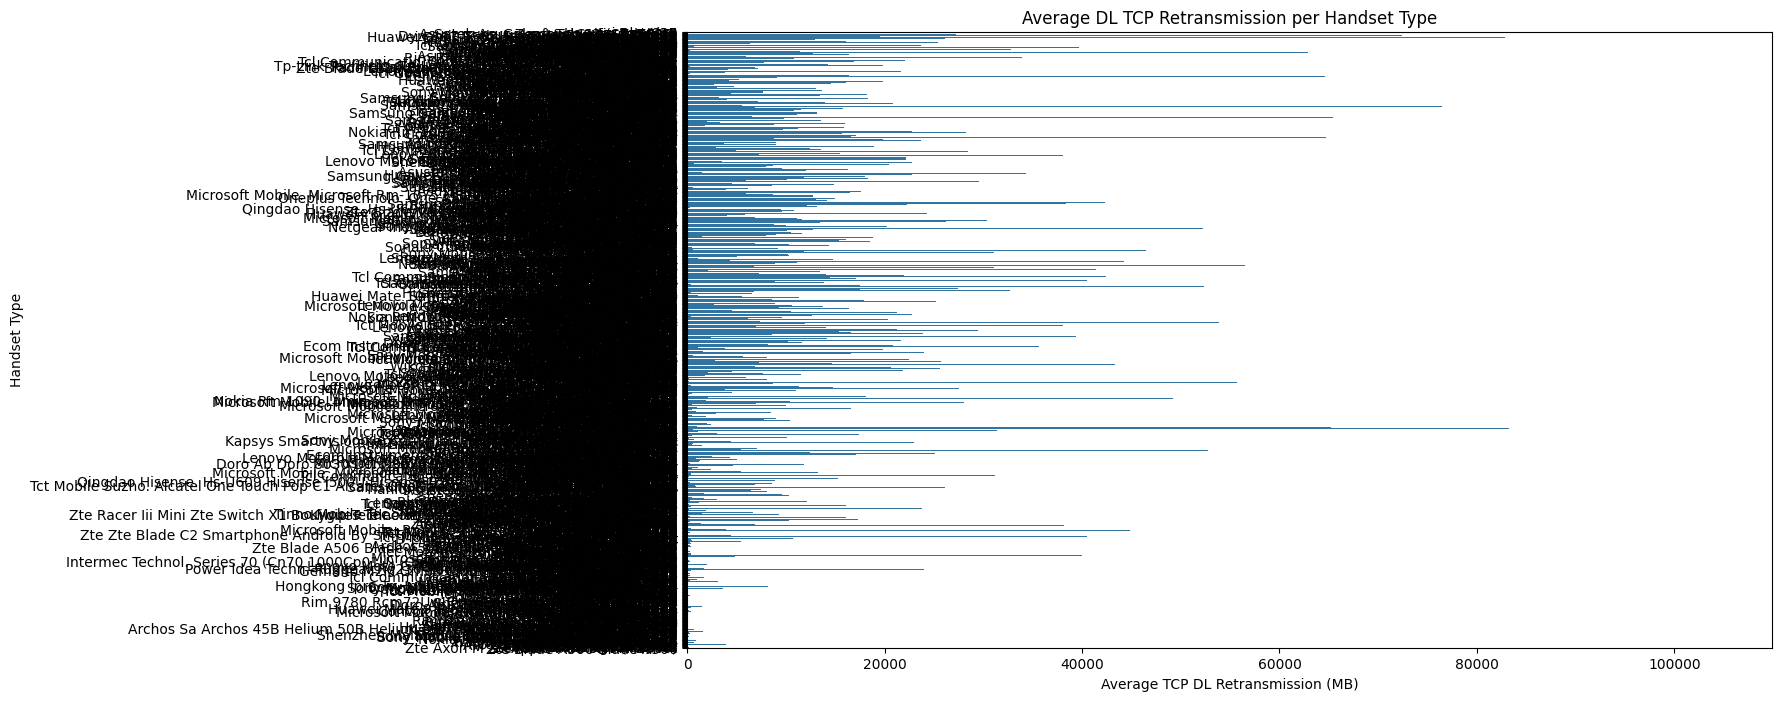

                             Handset Type  Avg Downlink Throughput (MB)  \
586                            Lg Lg-H635                    904.852760   
324                       Huawei Bln-Al10                    329.064569   
142   Asustek Asus Zenfone Selfie Zd551Kl                    318.953361   
974       Samsung Galaxy Tab S3 (Sm-T825)                    202.629717   
345                      Huawei E5776S-32                    163.829968   
...                                   ...                           ...   
1384                Zte Blade V8 Blade V8                      0.000000   
1373             Zebra Technologi. Mc67Na                      0.000000   
1377  Zte Axon M Zte Axon M Axon M Axon M                      0.000000   
27                Apple iPad Mini (A1600)                      0.000000   
1380            Zte Blade A506 Blade A506                      0.000000   

      Avg Uplink Throughput (MB)  Avg DL TCP Retransmission (MB)  \
586                     0.00000

In [13]:
# Group by handset type and compute the average throughput and TCP retransmission
handset_grouped = transformed_telecom_data.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (MB)': 'mean',
    'TCP UL Retrans. Vol (MB)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
}).reset_index()

# Rename columns for clarity
handset_grouped.columns = [
    'Handset Type',
    'Avg Downlink Throughput (MB)',
    'Avg Uplink Throughput (MB)',
    'Avg DL TCP Retransmission (MB)',
    'Avg UL TCP Retransmission (MB)'
]

# Sort values for better visualization
handset_grouped_sorted = handset_grouped.sort_values(by='Avg Downlink Throughput (MB)', ascending=False)

# Plot Average Throughput per Handset Type
plt.figure(figsize=(14, 8))
sns.barplot(data=handset_grouped_sorted, x='Avg Downlink Throughput (MB)', y='Handset Type')
plt.title('Average Downlink Throughput per Handset Type')
plt.xlabel('Average Downlink Throughput (MB)')
plt.ylabel('Handset Type')
plt.show()

# Plot Average TCP Retransmission per Handset Type
plt.figure(figsize=(14, 8))
sns.barplot(data=handset_grouped_sorted, x='Avg DL TCP Retransmission (MB)', y='Handset Type')
plt.title('Average DL TCP Retransmission per Handset Type')
plt.xlabel('Average TCP DL Retransmission (MB)')
plt.ylabel('Handset Type')
plt.show()

# Print the summary of the findings
print(handset_grouped_sorted)


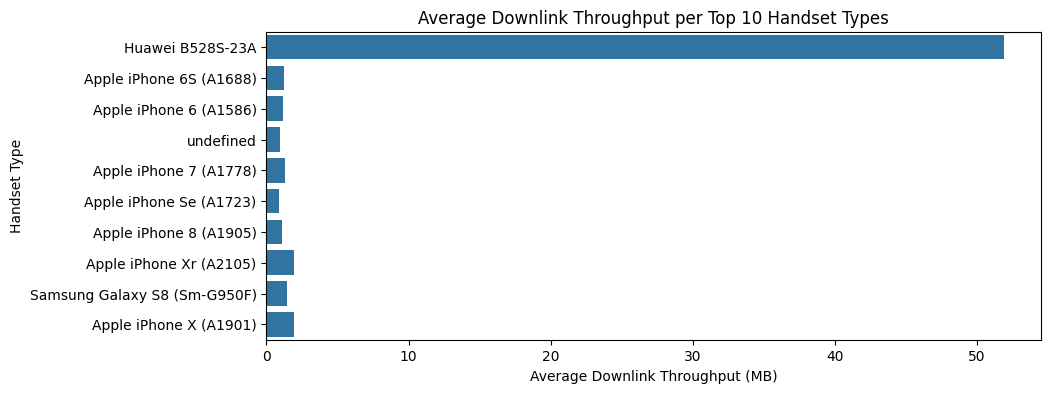

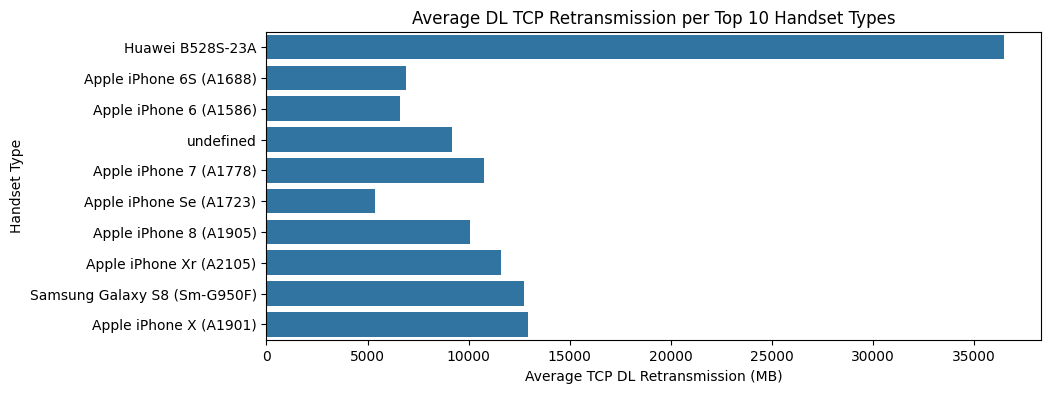

                      Handset Type  Count  Avg Downlink Throughput (MB)  \
316               Huawei B528S-23A  19752                     51.929400   
53         Apple iPhone 6S (A1688)   9419                      1.205573   
49          Apple iPhone 6 (A1586)   9023                      1.188601   
1395                     undefined   8987                      0.933889   
59          Apple iPhone 7 (A1778)   6326                      1.293308   
73         Apple iPhone Se (A1723)   5187                      0.857376   
66          Apple iPhone 8 (A1905)   4993                      1.106075   
78         Apple iPhone Xr (A2105)   4568                      1.927118   
955   Samsung Galaxy S8 (Sm-G950F)   4520                      1.463894   
75          Apple iPhone X (A1901)   3813                      1.951007   

      Avg DL TCP Retransmission (MB)  
316                     36493.835156  
53                       6918.948933  
49                       6581.845949  
1395              

In [15]:
# Group by handset type and compute the count, average throughput, and TCP retransmission
handset_grouped = transformed_telecom_data.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (MB)': 'mean',
    'TCP UL Retrans. Vol (MB)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'count'  # Counting the occurrences of each handset type
}).rename(columns={'Handset Type': 'Count'}).reset_index()

# Rename columns for clarity
handset_grouped.columns = [
    'Handset Type',
    'Avg Downlink Throughput (MB)',
    'Avg Uplink Throughput (MB)',
    'Avg DL TCP Retransmission (MB)',
    'Avg UL TCP Retransmission (MB)',
    'Count'  # Adding count for each handset type
]

# Sort values by count for top 10 handsets
handset_grouped_sorted = handset_grouped.sort_values(by='Count', ascending=False).head(10)

# Plot Average Throughput per Handset Type for Top 10 Handsets
plt.figure(figsize=(10, 4))
sns.barplot(data=handset_grouped_sorted, x='Avg Downlink Throughput (MB)', y='Handset Type')
plt.title('Average Downlink Throughput per Top 10 Handset Types')
plt.xlabel('Average Downlink Throughput (MB)')
plt.ylabel('Handset Type')
plt.show()

# Plot Average TCP Retransmission per Handset Type for Top 10 Handsets
plt.figure(figsize=(10, 4))
sns.barplot(data=handset_grouped_sorted, x='Avg DL TCP Retransmission (MB)', y='Handset Type')
plt.title('Average DL TCP Retransmission per Top 10 Handset Types')
plt.xlabel('Average TCP DL Retransmission (MB)')
plt.ylabel('Handset Type')
plt.show()

# Print the summary of the top 10 handsets based on count
print(handset_grouped_sorted[['Handset Type', 'Count', 'Avg Downlink Throughput (MB)', 'Avg DL TCP Retransmission (MB)']])


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the relevant features for clustering
features = ['Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (MB)',
            'TCP UL Retrans. Vol (MB)', 'Avg RTT UL (sec)', 'Avg RTT DL (sec)']

# Standardize the features
scaler = StandardScaler()
transformed_telecom_data_scaled = scaler.fit_transform(transformed_telecom_data[features])

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
transformed_telecom_data['Cluster'] = kmeans.fit_predict(transformed_telecom_data_scaled)

# Analyze the cluster centers to understand the characteristics of each group
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features)

# Display the cluster summary
print("Cluster centers summary:")
print(cluster_summary)

# Verify unique cluster labels
print("Unique cluster labels:", transformed_telecom_data['Cluster'].unique())

# Assign labels to each cluster for better interpretation
# Map the cluster numbers to descriptive names
cluster_mapping = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
transformed_telecom_data['ClusterNo'] = transformed_telecom_data['Cluster'].map(cluster_mapping)

# Verify if the mapping is successful
print(transformed_telecom_data[['Cluster', 'ClusterNo']].head())


Cluster centers summary:
   Avg Bearer TP UL (kbps)  Avg Bearer TP DL (kbps)  TCP DL Retrans. Vol (MB)  \
0               453.465893              5188.935893                  1.520011   
1              8818.306416             56601.428291                 19.410006   
2              8161.090909             62911.586777               2649.013455   

   TCP UL Retrans. Vol (MB)  Avg RTT UL (sec)  Avg RTT DL (sec)  
0                  0.054324          0.008572          0.090954  
1                  1.424482          0.045556          0.080934  
2                  1.412064          0.038628          0.112240  
Unique cluster labels: [0 1 2]
   Cluster  ClusterNo
0        0  Cluster 1
1        0  Cluster 1
2        0  Cluster 1
3        0  Cluster 1
4        0  Cluster 1


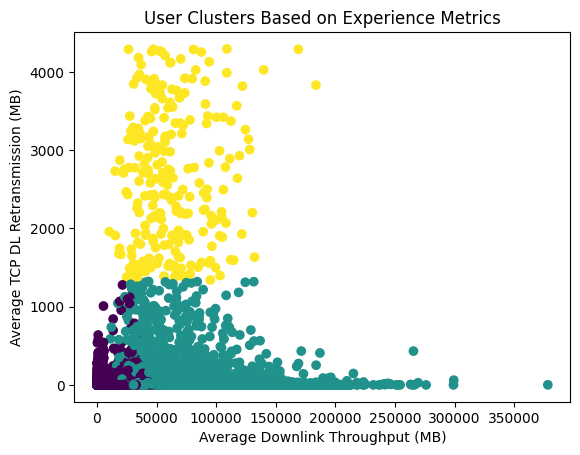

In [18]:

# 2D plot using the first two features (Throughput and Retransmission)
plt.scatter(transformed_telecom_data['Avg Bearer TP DL (kbps)'], transformed_telecom_data['TCP DL Retrans. Vol (MB)'], c=transformed_telecom_data['Cluster'], cmap='viridis')
plt.title('User Clusters Based on Experience Metrics')
plt.xlabel('Average Downlink Throughput (MB)')
plt.ylabel('Average TCP DL Retransmission (MB)')
plt.show()


**Satisfaction Analysis**

In [20]:
# Step 1: Add a column for total data volume (DL + UL) per application for each session
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    transformed_telecom_data[f'{app} Total'] = transformed_telecom_data[f'{app} DL (MB)'] + transformed_telecom_data[f'{app} UL (MB)']

# Step 2: Aggregate the data per user (IMSI)
user_behavior = transformed_telecom_data.groupby('IMSI').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),               # Assuming 'Bearer Id' is session identifier
    total_session_duration=('Dur. (sec)', 'sum'),                # Sum of session durations
    total_social_media_data=('Social Media Total', 'sum'),       # Total data volume for Social Media
    total_youtube_data=('Youtube Total', 'sum'),                 # Total data volume for YouTube
    total_netflix_data=('Netflix Total', 'sum'),                 # Total data volume for Netflix
    total_google_data=('Google Total', 'sum'),                   # Total data volume for Google
    total_email_data=('Email Total', 'sum'),                     # Total data volume for Email
    total_gaming_data=('Gaming Total', 'sum'),                   # Total data volume for Gaming
    total_other_data=('Other Total', 'sum')                      # Total data volume for Other
)

# Step 3: Calculate total download and upload data per user
# Download data
user_behavior['total_download_data'] = transformed_telecom_data.groupby('IMSI')[[
    'Social Media DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)',
    'Google DL (MB)', 'Email DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)'
]].sum().sum(axis=1)

# Upload data
user_behavior['total_upload_data'] = transformed_telecom_data.groupby('IMSI')[[
    'Social Media UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)',
    'Google UL (MB)', 'Email UL (MB)', 'Gaming UL (MB)', 'Other UL (MB)'
]].sum().sum(axis=1)

# Step 4: Display the aggregated user behavior data
user_behavior.head()


,number_of_xdr_sessions,total_session_duration,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,total_download_data,total_upload_data
IMSI,,,,,,,,,,,
0.000000e+00,570,37507.441,1053.243814,13083.866255,13128.867848,4385.040150,1300.747975,244176.435020,239047.383079,492628.331643,23547.252496
2.040471e+14,1,869.844,1.546088,40.940710,28.846230,9.218647,3.330974,43.070260,401.360457,467.857317,60.456049
2.040808e+14,1,877.385,0.715224,11.959905,26.592300,10.438660,1.520771,178.048738,470.526473,662.506156,37.295915
2.082001e+14,1,86.019,3.122781,19.882439,31.830562,1.624662,3.657501,9.124516,515.973704,531.421507,53.794658
2.082001e+14,1,86.254,2.577104,25.657632,27.785852,13.811478,3.855734,344.105897,309.610741,693.821166,33.583272


In [21]:
# If IMSI is not already a column, reset the index to make IMSI a column
customer_aggregation_reset = customer_aggregation.reset_index()
user_behavior_reset = user_behavior.reset_index()

# Merge the two DataFrames on the 'IMSI' column
merged_data = pd.merge(customer_aggregation_reset, user_behavior_reset, on='IMSI', how='inner')

merged_data['total_traffic'] = merged_data['total_download_data'] + merged_data['total_upload_data']
merged_data.head()


,index,IMSI,Avg TCP DL Retransmission (MB),Avg TCP UL Retransmission (MB),Avg RTT UL (sec),Avg RTT DL (sec),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,number_of_xdr_sessions,...,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,total_download_data,total_upload_data,total_traffic
0,0,0.000000e+00,11.507615,0.064311,0.010816,0.442767,10828.785965,1636.349123,unknown,570,...,1053.243814,13083.866255,13128.867848,4385.040150,1300.747975,244176.435020,239047.383079,492628.331643,23547.252496,516175.584140
1,1,2.040471e+14,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,Quectel Wireless. Quectel Ec21-E,1,...,1.546088,40.940710,28.846230,9.218647,3.330974,43.070260,401.360457,467.857317,60.456049,528.313366
2,2,2.040808e+14,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,Quectel Wireless. Quectel Ec25-E,1,...,0.715224,11.959905,26.592300,10.438660,1.520771,178.048738,470.526473,662.506156,37.295915,699.802071
3,3,2.082001e+14,0.002697,0.000000,0.016000,0.287000,87.000000,22.000000,Dn Electronics Danew Konnect 350,1,...,3.122781,19.882439,31.830562,1.624662,3.657501,9.124516,515.973704,531.421507,53.794658,585.216165
4,4,2.082001e+14,0.009107,0.018872,0.002000,0.082000,627.000000,127.000000,Samsung Galaxy Grand (Gt-I9060X),1,...,2.577104,25.657632,27.785852,13.811478,3.855734,344.105897,309.610741,693.821166,33.583272,727.404438


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances

# Step 1: Define features used for engagement and experience clustering
engagement_features = ['number_of_xdr_sessions', 'total_session_duration', 'total_traffic']
experience_features = ['Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)',
                       'Avg TCP DL Retransmission (MB)', 'Avg TCP UL Retransmission (MB)',
                       'Avg RTT UL (sec)', 'Avg RTT DL (sec)']

# Step 2: Perform K-means clustering for engagement features
# Set the number of clusters (you can change the number based on your data)
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
kmeans_engagement.fit(merged_data[engagement_features])
engagement_cluster_centers = kmeans_engagement.cluster_centers_

# Perform K-means clustering for experience features
kmeans_experience = KMeans(n_clusters=3, random_state=42)
kmeans_experience.fit(merged_data[experience_features])
experience_cluster_centers = kmeans_experience.cluster_centers_

# Step 3: Extract the cluster centers for the least engaged and worst experience clusters
# Assuming cluster 0 is the least engaged and worst experience cluster
engagement_cluster_0 = engagement_cluster_centers[0]  # 3D cluster center for engagement
experience_cluster_0 = experience_cluster_centers[0]  # 6D cluster center for experience

# Step 4: Calculate Engagement Score (distance from less engaged cluster center)
merged_data['Engagement Score'] = euclidean_distances(
    merged_data[engagement_features],
    engagement_cluster_0.reshape(1, -1)
)

# Step 5: Calculate Experience Score (distance from worst experience cluster center)
merged_data['Experience Score'] = euclidean_distances(
    merged_data[experience_features],
    experience_cluster_0.reshape(1, -1)
)

# Step 6: Display the data with engagement and experience scores
print(merged_data[['Engagement Score', 'Experience Score']].head())


   Engagement Score  Experience Score
0     514760.334559       9005.221725
1       2302.671135       1946.276875
2       2138.766567       1947.259186
3       2187.522948       1858.669218
4       2046.095243       1308.573137


In [23]:
# Step 6: Calculate Satisfaction Score (average of engagement and experience scores)
merged_data['Satisfaction Score'] = (merged_data['Engagement Score'] + merged_data['Experience Score']) / 2

# Step 7: Sort data by Satisfaction Score (lower score = higher satisfaction)
merged_data_sorted = merged_data.sort_values(by='Satisfaction Score', ascending=True)

# Step 8: Report the top 10 most satisfied customers
top_10_satisfied_customers = merged_data_sorted.head(10)
print(top_10_satisfied_customers[['IMSI', 'Satisfaction Score']])


               IMSI  Satisfaction Score
63060  2.082017e+14          109.263771
53122  2.082015e+14          139.933069
73644  2.082017e+14          144.575433
49245  2.082015e+14          144.576784
77468  2.082017e+14          144.953346
88839  2.082019e+14          148.284317
11379  2.082009e+14          154.222630
39851  2.082014e+14          162.774366
53856  2.082015e+14          164.603284
95684  2.082019e+14          175.054359


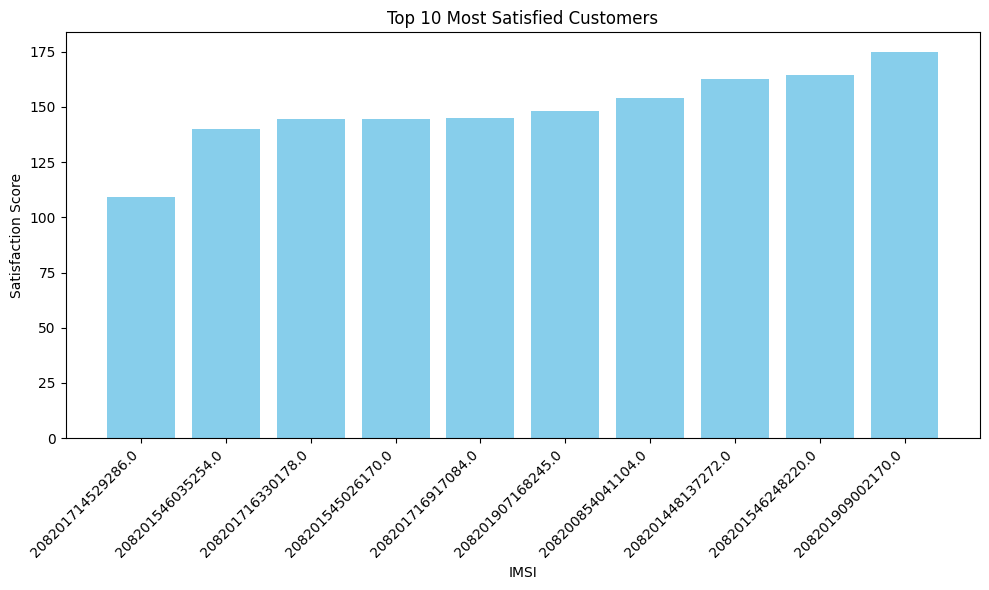

In [33]:
import matplotlib.pyplot as plt

# Step 9: Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_satisfied_customers['IMSI'].astype(str), top_10_satisfied_customers['Satisfaction Score'], color='skyblue')
plt.xlabel('IMSI')
plt.ylabel('Satisfaction Score')
plt.title('Top 10 Most Satisfied Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Random Forest Model**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features (all relevant features except 'Satisfaction Score') and target
features = ['number_of_xdr_sessions', 'total_session_duration', 'total_traffic',
            'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)', 'Avg TCP UL Retransmission (MB)',
            'Avg TCP DL Retransmission (MB)', 'Avg RTT UL (sec)', 'Avg RTT DL (sec)']

target = 'Satisfaction Score'

# Step 2: Split data into training and testing sets
X = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')

# Optionally, you can view the predictions vs actual values
pred_vs_actual = np.column_stack((y_pred, y_test))
print("Predicted vs Actual Satisfaction Scores (Top 10):")
print(pred_vs_actual[:10])


Mean Squared Error (MSE): 14601.677163527715
R-squared (R2 Score): 0.9998456826484723
Predicted vs Actual Satisfaction Scores (Top 10):
[[ 2423.46702271  2414.64877258]
 [13212.84368376 13251.74657806]
 [ 1762.69050835  1766.57454572]
 [ 6060.35066757  6074.78463753]
 [ 1840.09859508  1840.51454433]
 [11171.16081252 11813.27159252]
 [ 1662.13937548  1663.22500814]
 [ 7428.28777137  7436.80464444]
 [ 1832.69101135  1832.48496771]
 [18633.03537662 18579.26097502]]


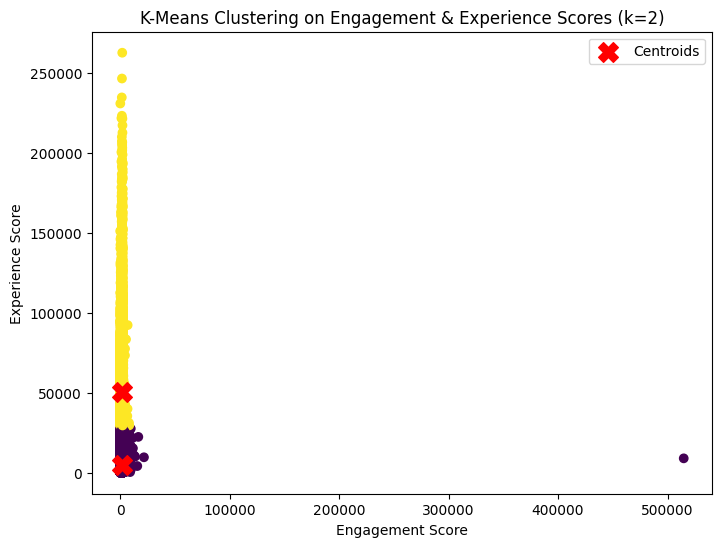

   Engagement Score  Experience Score  Cluster
0     514760.334559       9005.221725        0
1       2302.671135       1946.276875        0
2       2138.766567       1947.259186        0
3       2187.522948       1858.669218        0
4       2046.095243       1308.573137        0


In [25]:
from sklearn.cluster import KMeans

# Step 1: Prepare data for clustering
# We'll use the Engagement Score and Experience Score for K-means
clustering_features = merged_data[['Engagement Score', 'Experience Score']]

# Step 2: Run K-means clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(clustering_features)

# Step 3: Get cluster centers for visualization
cluster_centers = kmeans.cluster_centers_

# Step 4: Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Engagement Score'], merged_data['Experience Score'], c=merged_data['Cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering on Engagement & Experience Scores (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.show()

# Step 5: Print the cluster assignments for the first few customers
print(merged_data[['Engagement Score', 'Experience Score', 'Cluster']].head())


In [26]:
# Step 1: Calculate the average satisfaction and experience score per cluster
cluster_aggregates = merged_data.groupby('Cluster').agg(
    avg_satisfaction_score=('Satisfaction Score', 'mean'),
    avg_experience_score=('Experience Score', 'mean')
).reset_index()

# Step 2: Display the aggregated results
print(cluster_aggregates)


   Cluster  avg_satisfaction_score  avg_experience_score
0        0             3332.035813           5032.241875
1        1            26099.155286          50654.427440


In [28]:
load_data_to_postgres(merged_data[['IMSI', 'Engagement Score', 'Experience Score', 'Satisfaction Score']])



An error occurred: Execution failed on sql '
        SELECT
            name
        FROM
            sqlite_master
        WHERE
            type IN ('table', 'view')
            AND name=?;
        ': syntax error at or near ";"
LINE 8:             AND name=?;
                              ^



c:\Users\AII\Desktop\telecommunication-data-analysis\scripts\load_data.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.to_sql(table_name, con=connection, if_exists='replace', index=False)


In [29]:

# Example usage
load_data_to_postgres(merged_data[['IMSI', 'Engagement Score', 'Experience Score', 'Satisfaction Score']])


Data successfully loaded to table user_satisfaction_scores


In [32]:
query = "SELECT * FROM user_satisfaction_scores;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
df

c:\Users\AII\Desktop\telecommunication-data-analysis\scripts\load_data.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Successfully loaded the data


,IMSI,Engagement Score,Experience Score,Satisfaction Score
0,0.000000e+00,514760.334559,9005.221725,261882.778142
1,2.040471e+14,2302.671135,1946.276875,2124.474005
2,2.040808e+14,2138.766567,1947.259186,2043.012876
3,2.082001e+14,2187.522948,1858.669218,2023.096083
4,2.082001e+14,2046.095243,1308.573137,1677.334190
...,...,...,...,...
107261,2.082099e+14,1469.060742,1940.678769,1704.869756
107262,2.082099e+14,1528.184757,1940.678769,1734.431763
107263,2.082099e+14,1987.507718,1277.416791,1632.462254
107264,2.082522e+14,1360.073121,1947.868267,1653.970694
